# Capstone Project - Loan Default Prediction

This project aims to manage credit risk by using the past data and deciding whom to give the loan to in the future

In [1]:
import os as os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\Capstone\\PythonProject")

### Reading the Data

In [3]:
chunksize = 10 ** 4
chunks = []
for chunk in pd.read_csv("XYZCorp_LendingData.txt" ,delimiter='\t', chunksize=chunksize):
    chunks.append(chunk)
df = pd.concat(chunks, ignore_index=True)    
    

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(855969, 73)

## EDA:

In [8]:
df.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Statistical summary

In [10]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

### UniVariate Analysis and Data Cleaning starts:

### 1)Data Imputation 

#### Missing Value Check

In [12]:
df.isnull().sum().sort_values(ascending=False)

dti_joint                      855529
verification_status_joint      855527
annual_inc_joint               855527
il_util                        844360
mths_since_rcnt_il             843035
total_bal_il                   842681
inq_last_12m                   842681
open_acc_6m                    842681
open_il_6m                     842681
open_il_24m                    842681
open_il_12m                    842681
open_rv_12m                    842681
open_rv_24m                    842681
max_bal_bc                     842681
all_util                       842681
inq_fi                         842681
total_cu_tl                    842681
desc                           734157
mths_since_last_record         724785
mths_since_last_major_derog    642830
mths_since_last_delinq         439812
next_pymnt_d                   252971
tot_cur_bal                     67313
tot_coll_amt                    67313
total_rev_hi_lim                67313
emp_title                       49443
emp_length  

Graphical representation of Missing Values

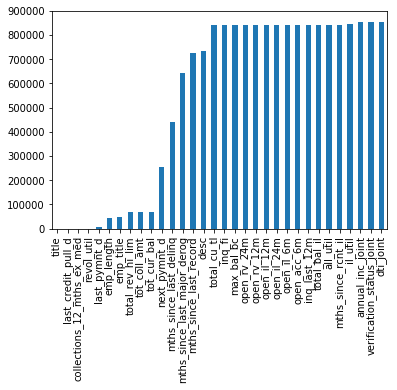

In [13]:
missing= df.isnull().sum().sort_values(ascending = False)
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

The Dataset is close to 34 MB size . Since its huge, lets remove columns that have too many NA(Columns with NA >70%).

#### Columns with NA > 70% :

In [5]:
null_rate = df.isnull().sum(axis = 0).sort_values(ascending = False)/float((len(df)))
null_rate[null_rate > 0.7]

dti_joint                      0.999486
verification_status_joint      0.999484
annual_inc_joint               0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_24m                    0.984476
open_il_12m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

The above 20 columns have NA values >70%. So lets delete those columns :

In [6]:
df.drop(null_rate[null_rate>0.7].index,axis = 1,inplace=True) # deleting columns

After deleting the columns with NA >70% , the current dimensions of the dataset is:

In [7]:
df.shape # Reduced from 73 columns to 53

(855969, 53)

#### Checking Uniqueness of data in each column :

In [17]:
unique_rate = df.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) #unique check and sort
unique_rate

id                            855969
member_id                     855969
total_pymnt_inv               494744
total_pymnt                   494607
tot_cur_bal                   322287
total_rec_int                 317683
emp_title                     290913
out_prncp_inv                 254328
total_rec_prncp               250385
out_prncp                     236739
last_pymnt_amnt               230321
revol_bal                      72779
installment                    67349
title                          60992
annual_inc                     48163
recoveries                     22627
total_rev_hi_lim               20794
collection_recovery_fee        20529
tot_coll_amt                   10139
funded_amnt_inv                 8818
total_rec_late_fee              5386
dti                             4074
funded_amnt                     1368
loan_amnt                       1368
revol_util                      1339
zip_code                         931
earliest_cr_line                 697
i

This shows : 
1) columns id and member_id are 100 % unique 
2) Policy_code has just 1 value throughout the dataset.
Considering the above 2 points, id,member_id, policy_code has to be deleted as this will not help in analysis.

Also further inspection has to be done on the columns : initial_list_status, term, pymnt_plan, application_type, acc_now_delinq

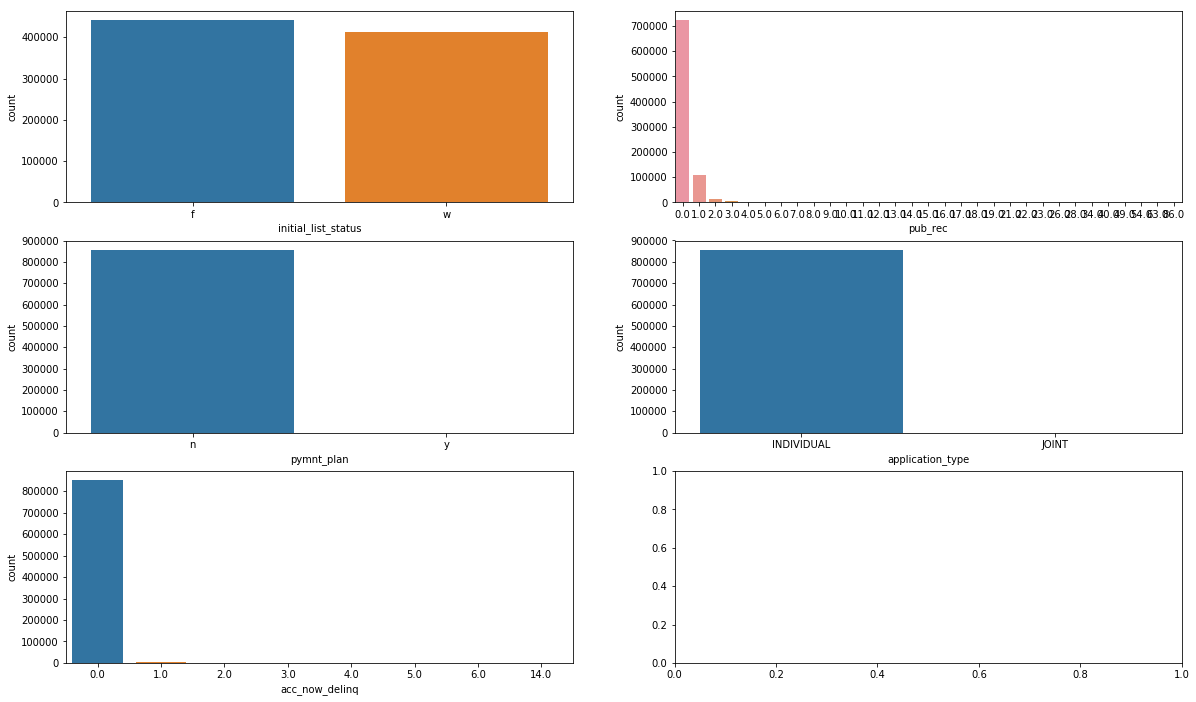

In [18]:
#Count plots
fig, ax =plt.subplots(nrows=3, ncols=2, figsize=(20,12))
sns.countplot(df.initial_list_status, ax=ax[0,0])
sns.countplot(df.pub_rec, ax=ax[0,1])
sns.countplot(df.pymnt_plan, ax=ax[1,0])
sns.countplot(df.application_type, ax=ax[1,1])
sns.countplot(df.acc_now_delinq, ax=ax[2,0])
fig.show()

Above shows payment_plan,application_type and acc_now_delinq are highly unbalanced (more than 90% are single value). 
Also columns - desc, emp_title,zip_code,title,addr_state,earliest_cr_line,last_pymnt_d,next_pymnt_d, last_credit_pull_d and sub_grade are too descriptive for Analysis, which are to be deleted.

Hence the columns to be deleted are :
    1) id,   2) member_id , 3)  policy_code ,4) payment_plan, 5) application_type ,6) acc_now_delinq ,
    7) emp_title ,8) zip_code ,9) title 10)addr_state,  11) earliest_cr_line,  12) last_pymnt_d,  13) next_pymnt_d and    14) last_credit_pull_d 15) sub_grade

In [8]:
delete_cols = [ "id", "member_id","policy_code", "pymnt_plan",  "application_type", "acc_now_delinq", "emp_title",
               "zip_code", "title","addr_state","earliest_cr_line","last_pymnt_d","next_pymnt_d","last_credit_pull_d", "sub_grade"]

In [9]:
df.drop(delete_cols, axis=1, inplace=True)

In [10]:
df.shape
# Columns have reduced to 38.

(855969, 38)

### Handling Categorical features :

#### Formatting some columns :

In [22]:
#emp_length is categorical in nature
df.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [23]:
#term is categorical in nature
df.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [11]:
df["term"] = df["term"].str.split(" ").str[1] # transform term to integer
df["emp_length"] = df["emp_length"].str.extract("(\d+)").astype(float) # transform emp_length to integer

In [12]:
df.head(7)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-2011,credit_card,27.65,0.0,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Dec-2011,car,1.00,0.0,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-2011,small_business,8.72,0.0,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-2011,other,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-2011,other,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,Dec-2011,wedding,11.20,0.0,3.0,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,NaN,NaN,NaN,0
6,7000.0,7000.0,7000.0,60,15.96,170.08,C,8.0,RENT,47004.0,Not Verified,Dec-2011,debt_consolidation,23.51,0.0,1.0,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,NaN,NaN,NaN,0


### Creating new feature from the features - Funded_amnt  and Funded_amnt_inv :

Checking the above table :
Funded_amnt - The total amount committed to that loan at that point in time.
Funded_amnt_inv - The total amount committed by investors for that loan at that point in time.

Always Funded_amnt <=Funded_amnt_inv , so lets convert it to a categoricla kind. 
When they are same, mark as equal. When they are not same(the investor pays fewer than expected), mark it as less.

In [12]:
df['amt_difference'] = 'equal'
df.loc[(df['funded_amnt'] - df['funded_amnt_inv']) > 0,'amt_difference'] = 'less'

In [13]:
#Dropping the funded_amnt and funded_amnt_inv and keeping amt_difference:
df.drop('funded_amnt', axis=1, inplace=True)
df.drop('funded_amnt_inv', axis=1, inplace=True)
df.head(7)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,amt_difference
0,5000.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-2011,credit_card,27.65,0.0,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0,less
1,2500.0,60,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Dec-2011,car,1.00,0.0,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,1,equal
2,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-2011,small_business,8.72,0.0,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0,equal
3,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-2011,other,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0,equal
4,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-2011,other,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0,equal
5,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,Dec-2011,wedding,11.20,0.0,3.0,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,NaN,NaN,NaN,0,equal
6,7000.0,60,15.96,170.08,C,8.0,RENT,47004.0,Not Verified,Dec-2011,debt_consolidation,23.51,0.0,1.0,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,NaN,NaN,NaN,0,equal


In [14]:
df.shape

(855969, 37)

### Checking highly biased columns and converting to categorical  :

In [29]:
print(df.delinq_2yrs.value_counts()/len(df.delinq_2yrs))
print(df.pub_rec.value_counts()/len(df.pub_rec))
print(df.inq_last_6mths.value_counts()/len(df.inq_last_6mths))

0.0     0.809241
1.0     0.127029
2.0     0.037473
3.0     0.013330
4.0     0.005931
5.0     0.003018
6.0     0.001634
7.0     0.000855
8.0     0.000512
9.0     0.000314
10.0    0.000209
11.0    0.000136
12.0    0.000102
13.0    0.000067
14.0    0.000051
15.0    0.000030
16.0    0.000020
18.0    0.000013
17.0    0.000012
19.0    0.000009
22.0    0.000004
26.0    0.000002
30.0    0.000001
21.0    0.000001
20.0    0.000001
39.0    0.000001
27.0    0.000001
29.0    0.000001
24.0    0.000001
Name: delinq_2yrs, dtype: float64
0.0     0.847525
1.0     0.127248
2.0     0.016648
3.0     0.005029
4.0     0.001748
5.0     0.000850
6.0     0.000428
7.0     0.000195
8.0     0.000129
9.0     0.000054
10.0    0.000048
11.0    0.000025
12.0    0.000016
13.0    0.000014
15.0    0.000007
18.0    0.000006
16.0    0.000006
21.0    0.000005
17.0    0.000004
14.0    0.000002
19.0    0.000002
49.0    0.000002
40.0    0.000001
26.0    0.000001
63.0    0.000001
22.0    0.000001
28.0    0.000001
86.0    0.0000

1) delinq_2yrs: 80% are 0

2) pub_rec:84% are 0.0
    
3) inq_last_6mths : 56.39% are 0.0

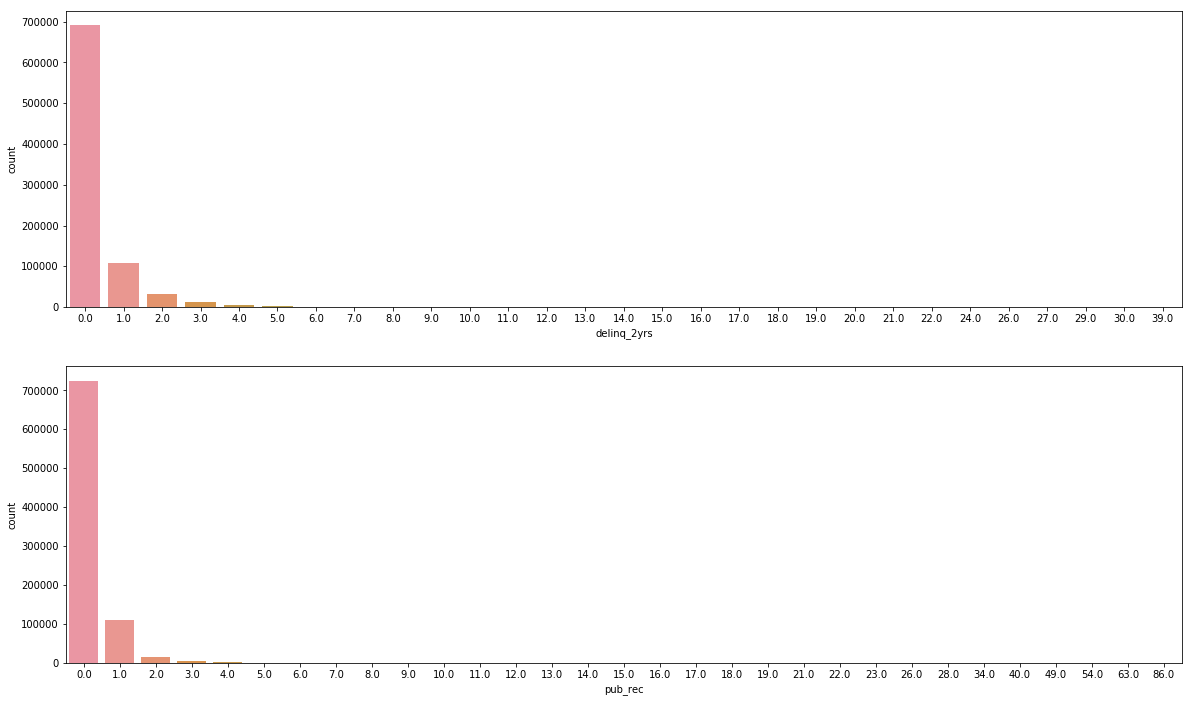

In [30]:
#Count plots of delinq_2yrs and pub_rec
fig, ax =plt.subplots(nrows=2, ncols=1, figsize=(20,12))
sns.countplot(df.delinq_2yrs, ax=ax[0])
sns.countplot(df.pub_rec, ax=ax[1])
fig.show()

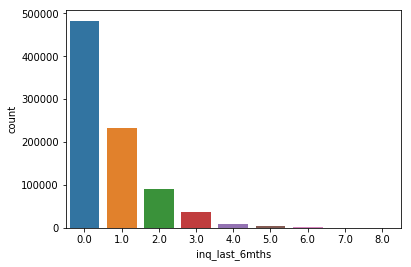

In [31]:
#count plots of inq_last_6mths
plt.figsize=(10,12)
sns.countplot(df.inq_last_6mths)
plt.show()

Transforming to categorical values as these are highly biased :

In [15]:
# 80% are 0
df["delinq_2yrs_cat"] = 0
df.loc[df["delinq_2yrs"] > 0, "delinq_2yrs_cat"] = 1

# 56% are 0
df["inq_last_6mths_cat"] = 0
df.loc[df["inq_last_6mths"]>0 ,"inq_last_6mths_cat"] = 1

# 84% are 0
df["pub_rec_cat"] = 0
df.loc[df["pub_rec"]>0,"pub_rec_cat"] = 1

In [16]:
#Deleting the existing features are keeping new features:
df.drop ( "delinq_2yrs",axis=1, inplace =True)
df.drop ( "inq_last_6mths",axis=1, inplace =True)
df.drop ( "pub_rec",axis=1, inplace =True)

In [17]:
df.shape

(855969, 37)

In [20]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,amt_difference,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat
0,5000.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-2011,credit_card,27.65,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0,less,0,1,0
1,2500.0,60,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Dec-2011,car,1.00,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,1,equal,0,1,0
2,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-2011,small_business,8.72,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0,equal,0,1,0
3,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-2011,other,20.00,35.0,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0,equal,0,1,0
4,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-2011,other,17.94,38.0,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0,equal,0,0,0


### Checking Multicollinearity: 

In [36]:
#A sample of the original dataset is taken to check multicollinearity as, its very huge
df_sample = df.sample(frac=.003)

In [37]:
df_sample.shape

(2568, 37)

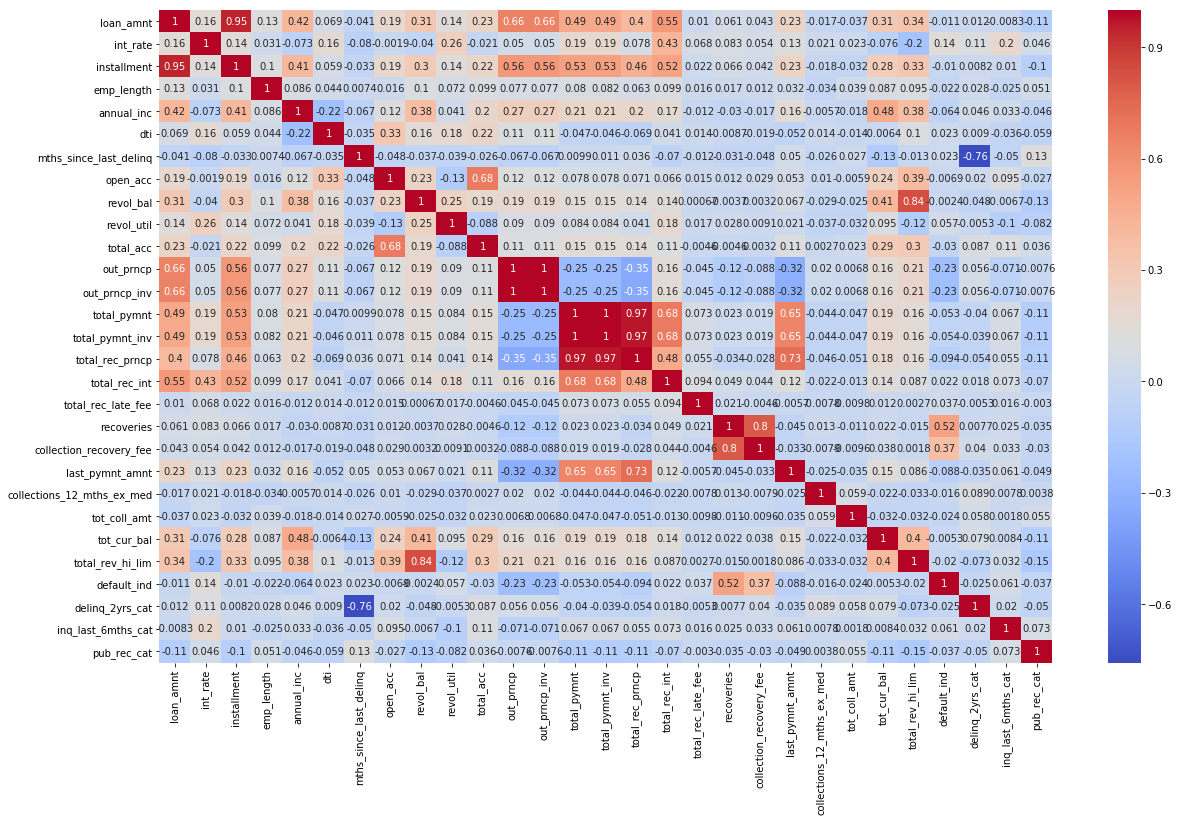

In [38]:
corr_mat=df_sample.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)
plt.show()

Considering the heatmap above, lets delete the columns which has high correlation :
out_prncp_inv , revol_bal, collection_recovery_fee, total_rec_prncp, total_pymnt_inv , total_rev_hi_lim

In [18]:
delete_cols = ["out_prncp_inv" , "revol_bal", "collection_recovery_fee", "total_rec_prncp", "total_pymnt_inv" ,
               "total_rev_hi_lim"]
df.drop(delete_cols, axis=1, inplace=True)

In [19]:
df.shape

(855969, 31)

### Handling missing values  :

In [21]:
missing= df.isnull().sum().sort_values(ascending = False)
missing=missing[missing>0]
print("Missing ",missing)

Missing  mths_since_last_delinq        439812
tot_cur_bal                    67313
tot_coll_amt                   67313
emp_length                     43061
revol_util                       446
collections_12_mths_ex_med        56
dtype: int64


In [20]:
#Filling missing values of categorical features
df.emp_length.fillna("10.0",inplace=True)
#df.emp_length.fillna(df.emp_length.mode(),inplace=True)

In [21]:
#Filling missing values of numerical features
df.tot_cur_bal.fillna(df.tot_cur_bal.median(),inplace=True)
df.tot_coll_amt.fillna(df.tot_coll_amt.median(),inplace=True)
df.revol_util.fillna(df.revol_util.median(),inplace=True)
df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.median(),inplace=True)
df.mths_since_last_delinq.fillna(df.mths_since_last_delinq.median(),inplace=True)

All missing values are filled :


In [22]:
missing= df.isnull().sum().sort_values(ascending = False)
missing=missing[missing>0]
print("Missing ",missing)

Missing  Series([], dtype: int64)


### One-Hot Encoding:

In [23]:
cat_features = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs_cat', 
                'inq_last_6mths_cat', 'pub_rec_cat', 'initial_list_status','emp_length','amt_difference']
#emp_length is numeric , but categorical in nature

In [24]:
df = pd.get_dummies(df, columns = cat_features, drop_first=True)
df.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,mths_since_last_delinq,open_acc,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,default_ind,term_60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,delinq_2yrs_cat_1,inq_last_6mths_cat_1,pub_rec_cat_1,initial_list_status_w,emp_length_2.0,emp_length_3.0,emp_length_4.0,emp_length_5.0,emp_length_6.0,emp_length_7.0,emp_length_8.0,emp_length_9.0,emp_length_10.0,emp_length_10.0,amt_difference_less
0,5000.0,10.65,162.87,24000.0,Dec-2011,27.65,31.0,3.0,83.7,9.0,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,81008.5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2500.0,15.27,59.83,30000.0,Dec-2011,1.00,31.0,3.0,9.4,4.0,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,81008.5,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,12252.0,Dec-2011,8.72,31.0,2.0,98.5,10.0,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,81008.5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,339.31,49200.0,Dec-2011,20.00,35.0,10.0,21.0,37.0,0.0,12226.302212,2209.33,16.97,0.00,357.48,0.0,0.0,81008.5,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3000.0,12.69,67.79,80000.0,Dec-2011,17.94,38.0,15.0,53.9,38.0,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,81008.5,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking Data : Balance/UnBalanced

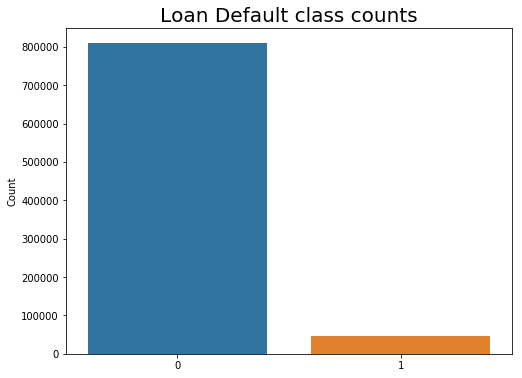

Count of Default_Ind = 0 :  809502
Count of Default_Ind = 1  : 46467
Proportion of Default_Ind = 1 to Default_Ind = 0  is 5.74%


In [34]:
plt.figure(figsize=(8, 6))
sns.countplot('default_ind', data= df)
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan Default class counts", y=1, fontdict={"fontsize": 20});
plt.show()
def_ind0 = df[df.default_ind==0].shape[0]
def_ind1 = df[df.default_ind==1].shape[0]
print("Count of Default_Ind = 0 : ",def_ind0)
print("Count of Default_Ind = 1  :",def_ind1)
print(f"Proportion of Default_Ind = 1 to Default_Ind = 0  is {(def_ind1 / def_ind0) * 100:.2f}%")

#### Clearly the dataset is unbalanced, which has to be taken into account duirng model creation

### Splitting to Train and Test Datasets based on issue_d :

In [25]:
#Converting issue_d from format "June 2015" to "2015-06-01"
df.issue_d = pd.to_datetime(df.issue_d,infer_datetime_format=True)
df.issue_d.head(5)

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

### The data should be divided into train (June 2007 - May 2015) and out-of-time test (June 2015 - Dec 2015) data


In [26]:
#Spliting Data Into Test
test = df.loc[df['issue_d']>='2015-06-01',:]
#%%
#Spliting Data Into Train
train =df.loc[df['issue_d']<'2015-06-01']

In [27]:
print("Training Dataset : ", train.shape)
print("Testing Dataset : ", test.shape)

Training Dataset :  (598978, 62)
Testing Dataset :  (256991, 62)


In [28]:
#Removing issue_d from train and test datasets, as it was needed only to split the data.Its not required further.
train = train.drop("issue_d",axis=1)
test = test.drop("issue_d",axis=1)

In [29]:
X_train = train.values[:,:-1]
Y_train = train.values[:,-1]

X_test = test.values[:,:-1]
Y_test = test.values[:,-1]

### Standardizing the Data :

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

## Model Creation Starts:

The columns in the dataset, which are used for model creation :

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 62 columns):
loan_amnt                              855969 non-null float64
int_rate                               855969 non-null float64
installment                            855969 non-null float64
annual_inc                             855969 non-null float64
issue_d                                855969 non-null datetime64[ns]
dti                                    855969 non-null float64
mths_since_last_delinq                 855969 non-null float64
open_acc                               855969 non-null float64
revol_util                             855969 non-null float64
total_acc                              855969 non-null float64
out_prncp                              855969 non-null float64
total_pymnt                            855969 non-null float64
total_rec_int                          855969 non-null float64
total_rec_late_fee                     855969 non-null float64


## 1) Logistic Regression Model

In [32]:
# Building Model using X_train,Y_train
from sklearn.linear_model import LogisticRegression 
log_reg_model = LogisticRegression()
result = log_reg_model.fit(X_train_std,Y_train)

# Predicting Model Using X_test
Y_pred=log_reg_model.predict(X_test_std)

In [33]:
print(log_reg_model.coef_)
print(log_reg_model.intercept_)

[[ 6.50159045e-01 -8.45471684e-01 -2.63307202e-01 -5.72518669e-02
  -3.92881778e-02 -4.01548643e-02 -5.17405560e-02  7.16536150e-02
   4.86544744e-02 -4.01348355e-01  3.56200971e-01  7.63413874e-02
   2.19833194e-02 -2.52413496e-02 -2.57182089e-01  1.47314398e-02
  -1.05099743e-01 -1.18834862e-01  6.04442761e-02  3.29785099e-01
   2.85334083e-01  1.47538898e-01  2.65365397e-01  3.19427528e-01
   2.35679843e-01  1.74825250e-01  1.50908984e-03 -3.74870132e-04
   3.33807242e-02 -1.26561520e-02  6.87253694e-03 -6.53534257e-02
   1.08320927e-01 -9.31654044e-02 -4.23012050e-02  5.50259548e-02
  -1.54370391e-03 -4.90201687e-03  4.82412824e-03 -6.36376286e-03
  -7.51296506e-03  9.45956424e-03  1.24715045e-03  4.36826774e-02
  -1.83483706e-02  2.91264947e-02  9.03525852e-03 -2.38626505e-02
  -6.78138559e-03 -1.17287081e+00 -2.83891507e-03 -1.32326138e-02
  -1.02741611e-02 -1.66575982e-02 -2.43839697e-02 -2.30428861e-02
  -2.84202219e-02 -2.38269776e-02 -6.72760359e-02 -4.72449920e-02]]
[-2.6761

### Evaluation of Logistic Regression Model :

In [34]:
from sklearn import metrics
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :")
print(confusion_mat)
print("Classification Report :")
print(metrics.classification_report(Y_test, Y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(log_reg_model.score(X_test_std, Y_test) *100 ), "%")
print("Precision of the logistic regression model: ",metrics.precision_score(Y_test, Y_pred))
print("Recall of the logistic regression model:: ",metrics.recall_score(Y_test, Y_pred))

Confusion Matrix :
[[232423     26]
 [ 24527     15]]
Classification Report :
             precision    recall  f1-score   support

          0       0.90      1.00      0.95    232449
          1       0.37      0.00      0.00     24542

avg / total       0.85      0.90      0.86    256991

Accuracy of logistic regression classifier on test set: 90.4460 %
Precision of the logistic regression model:  0.36585365853658536
Recall of the logistic regression model::  0.0006111971314481298


Plotting Confusion Matrix of Logistic Regression:


(0.0, 2.0, 2.0, 0.0)

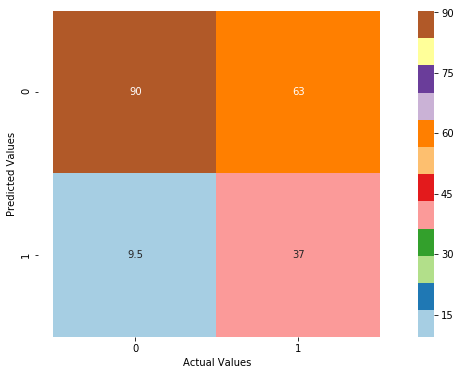

In [48]:
print("Plotting Confusion Matrix of Logistic Regression:")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

In [49]:
# predict probabilities
y_pred_prob= log_reg_model.predict_proba(X_test_std)
print(y_pred_prob)

[[0.9897857  0.0102143 ]
 [0.99356764 0.00643236]
 [0.99050905 0.00949095]
 ...
 [0.99527483 0.00472517]
 [0.98046342 0.01953658]
 [0.95132241 0.04867759]]


In [50]:
preds = y_pred_prob[:,1]
# calculate pr curve
from sklearn.metrics import auc, precision_recall_curve
precision_lr, recall_lr, threshold = precision_recall_curve(Y_test, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_lr, precision_lr))

PR-AUC:  0.21377565035624466


In [51]:
#To find the optimum threshold value
for a in np.arange(0,1,0.01):
    predict_log = np.where(y_pred_prob[:,1] > a, 1, 0)
    confusion_mat=confusion_matrix(Y_test, predict_log)
    total_err=confusion_mat[0,1]+confusion_mat[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          confusion_mat[1,0]," , type 1 error:", confusion_mat[0,1])

Errors at threshold  0.0 : 232449  , type 2 error : 0  , type 1 error: 232449
Errors at threshold  0.01 : 148114  , type 2 error : 1714  , type 1 error: 146400
Errors at threshold  0.02 : 78677  , type 2 error : 3409  , type 1 error: 75268
Errors at threshold  0.03 : 68299  , type 2 error : 4570  , type 1 error: 63729
Errors at threshold  0.04 : 63448  , type 2 error : 6704  , type 1 error: 56744
Errors at threshold  0.05 : 58709  , type 2 error : 8989  , type 1 error: 49720
Errors at threshold  0.06 : 53965  , type 2 error : 11110  , type 1 error: 42855
Errors at threshold  0.07 : 50484  , type 2 error : 13159  , type 1 error: 37325
Errors at threshold  0.08 : 48066  , type 2 error : 14992  , type 1 error: 33074
Errors at threshold  0.09 : 45835  , type 2 error : 16684  , type 1 error: 29151
Errors at threshold  0.1 : 43314  , type 2 error : 18138  , type 1 error: 25176
Errors at threshold  0.11 : 40705  , type 2 error : 19359  , type 1 error: 21346
Errors at threshold  0.12 : 37979  

### ROC Curve of Logistic Regression Model:

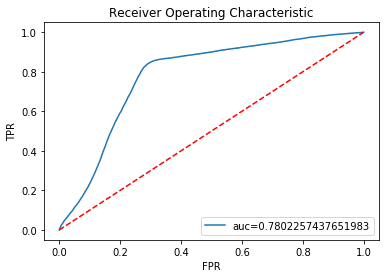

In [52]:
from sklearn import metrics
y_pred_prob = log_reg_model.predict_proba(X_test_std)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test,y_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### The AUC of the Base Logistic Regression model is 78.02%. Lets check Logistic regression with k-fold cross validation as well.

### K - FOLD CROSS VALIDATION :

In [53]:
#Using cross validation
log_reg2=LogisticRegression()
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

KFold(n_splits=10, random_state=None, shuffle=False)


In [54]:
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=log_reg2,X=X_train_std,
                                    y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print("Mean of all Accuracies : ",kfold_cv_result.mean())

[0.64275936 0.86199873 0.81588701 0.84006144 0.96509065 0.957845
 0.88702461 0.8964907  0.95200093 0.96235204]
Mean of all Accuracies :  0.8781510473688148


Mean of all Accuracies of the k-fold model is :  87.82%, where as the accuracy of the logistic regression is : 90.45 %.. Since botha are close, lets go ahead with base logistic regression model.

## 2)Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')

model_DT.fit(X_train_std,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

Predicting the output for X_test :

In [56]:
Y_pred = model_DT.predict(X_test_std)

### Evaluation of the DT model :

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_mat = confusion_matrix(Y_test, Y_pred)
print(confusion_mat)

print("Classification report: ")
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of the DT model: ",acc *100, "%")
print("Precision of the DT model: ",metrics.precision_score(Y_test, Y_pred))
print("Recall of the DT model:: ",metrics.recall_score(Y_test, Y_pred))

[[232441      8]
 [ 24539      3]]
Classification report: 
             precision    recall  f1-score   support

          0       0.90      1.00      0.95    232449
          1       0.27      0.00      0.00     24542

avg / total       0.84      0.90      0.86    256991

Accuracy of the DT model:  90.44830363709235 %
Precision of the DT model:  0.2727272727272727
Recall of the DT model::  0.00012223942628962595


Plotting Confusion Matrix of Decision Tree:


(0.0, 2.0, 2.0, 0.0)

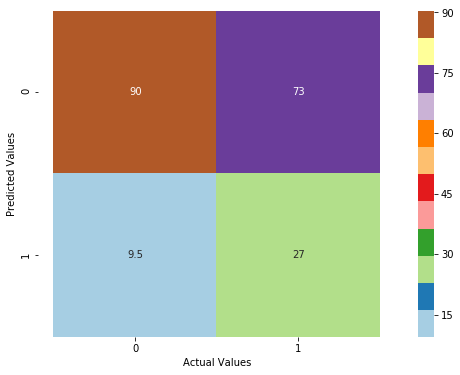

In [58]:
print("Plotting Confusion Matrix of Decision Tree:")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

### ROC Curve of DT Model :

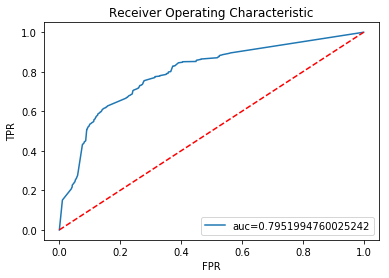

In [59]:
#ROC curve
y_dt_pred_prob = model_DT.predict_proba(X_test_std)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test,y_dt_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_dt_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### AUC of Decision Tree model is 79. 52%

## 3) Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50)
rf_model = forest.fit(X_train_std,Y_train)

In [72]:
forest.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [73]:
y_rf_pred = rf_model.predict(X_test_std) #predicted values of y

### Evaluation of RF Model :

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_mat = confusion_matrix(Y_test, y_rf_pred)
print(confusion_mat)
print("Classification report: ")
print(classification_report(Y_test, y_rf_pred))
acc= accuracy_score(Y_test, y_rf_pred)
print("Accuracy of the RF model: ",acc*100, "%")
print("Precision of the RF model: ",metrics.precision_score(Y_test, y_rf_pred))
print("Recall of the RF model:: ",metrics.recall_score(Y_test, y_rf_pred))
print("F1 Score of the RF model:: ",metrics.f1_score(Y_test, y_rf_pred))

[[232234    215]
 [ 24429    113]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    232449
           1       0.34      0.00      0.01     24542

   micro avg       0.90      0.90      0.90    256991
   macro avg       0.62      0.50      0.48    256991
weighted avg       0.85      0.90      0.86    256991

Accuracy of the RF model:  90.4105591246386 %
Precision of the RF model:  0.3445121951219512
Recall of the RF model::  0.004604351723575911
F1 Score of the RF model::  0.00908725371934057


Plotting Confusion Matrix of Random Forest :


(0.0, 2.0, 2.0, 0.0)

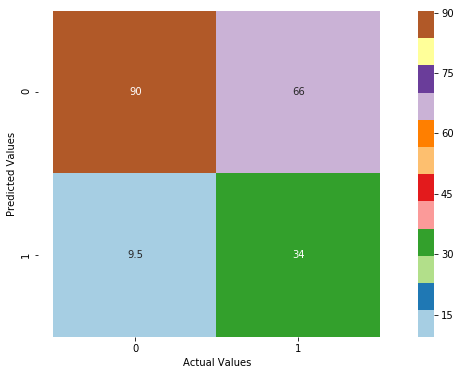

In [75]:
print("Plotting Confusion Matrix of Random Forest :")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

### ROC Curve of RF Model :

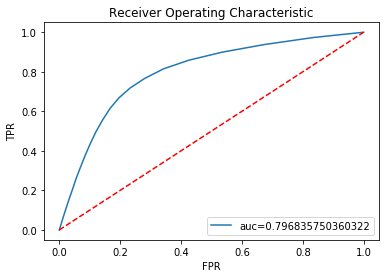

In [76]:
#ROC curve
y_rf_pred_prob = rf_model.predict_proba(X_test_std)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test,y_rf_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_rf_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### AUC of Random Forest model is 80.86%

## 4) AdaBoost Classifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost_model = adaboost.fit(X_train_std,Y_train)

In [78]:
adaboost_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [79]:
y_adaboost_pred = adaboost_model.predict(X_test_std) #predicted values of y

### Evaluation of AdaBoost Classifier :

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_mat = confusion_matrix(Y_test, y_adaboost_pred)
print(confusion_mat)
print("Classification report: ")
print(classification_report(Y_test, y_adaboost_pred))
acc= accuracy_score(Y_test, y_adaboost_pred)
print("Accuracy of the AdaBoost Classifier model: ",acc *100, "%")
print("precision of the AdaBoost Classifier model: ",metrics.precision_score(Y_test, y_adaboost_pred))
print("recall of the AdaBoost Classifier model:: ",metrics.recall_score(Y_test, y_adaboost_pred))

[[232437     12]
 [ 24538      4]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    232449
           1       0.25      0.00      0.00     24542

   micro avg       0.90      0.90      0.90    256991
   macro avg       0.58      0.50      0.48    256991
weighted avg       0.84      0.90      0.86    256991

Accuracy of the AdaBoost Classifier model:  90.44713628103707 %
precision of the AdaBoost Classifier model:  0.25
recall of the AdaBoost Classifier model::  0.00016298590171950127


Plotting Confusion Matrix of AdaBoost Classifer :


(0.0, 2.0, 2.0, 0.0)

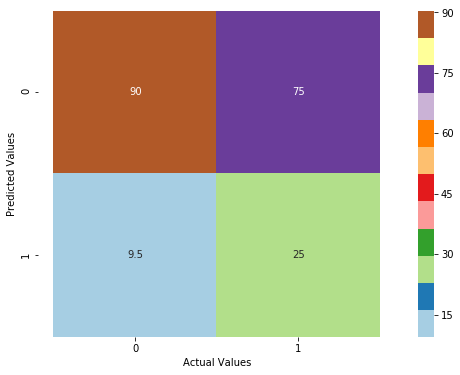

In [81]:
print("Plotting Confusion Matrix of AdaBoost Classifer :")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

### ROC Curve of AdaBoost Classifier :

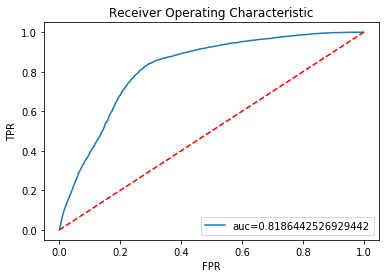

In [82]:
#ROC curve
y_ad_pred_prob = adaboost_model.predict_proba(X_test_std)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test,y_ad_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_ad_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### AUC of AdaBoostClassifier Model is 81.86%

### Balanced Data Models :

In [35]:
print("Balance Ratio in Unbalanced Train dataset :",sum(Y_train)/len(Y_train)*100,"%")
print("Balance Ratio in Unbalanced Test dataset :",sum(Y_test)/len(Y_test)*100,"%")

Balance Ratio in Unbalanced Train dataset : 11.96554798339839 %
Balance Ratio in Unbalanced Test dataset : 9.5497507694822 %


#### We balance the classes using the SMOTE ( Synthetic Minority Over-sampling Technique).The minority class is oversampled by SMOTE

In [36]:
# transform the dataset
from imblearn.over_sampling import SMOTE

X_train_std_bal, Y_train_bal = SMOTE(random_state=0).fit_sample(X_train_std,Y_train)
X_test_std_bal, Y_test_bal = X_test_std, Y_test

In [37]:
print("Balance Ratio in Balanced Train dataset :",sum(Y_train_bal)/len(Y_train_bal))
print("Balance Ratio in Balanced Test dataset :",sum(Y_test)/len(Y_test))

Balance Ratio in Balanced Train dataset : 0.5
Balance Ratio in Balanced Test dataset : 0.095497507694822


#### Before balancing the data, only 11% are bad loan. Which will harm the performance of the model.After balancing the data using SMOTE, 50% are bad loan.Now the dataset is balanced.

## 1) Logistic Regression Base Model on Balanced Data

In [39]:
# Building Model using X_train,Y_train
from sklearn.linear_model import LogisticRegression 
log_reg_model = LogisticRegression()
result = log_reg_model.fit(X_train_std_bal,Y_train_bal)

# Predicting Model Using X_test
Y_pred=log_reg_model.predict(X_test_std_bal)

In [40]:
print(log_reg_model.coef_)
print(log_reg_model.intercept_)

[[ 8.25452164e-01 -9.22886878e-01 -3.66503794e-01 -1.11705112e-01
  -2.76736751e-04 -1.06377286e-01 -5.99320552e-02  1.02924623e-01
   1.51043678e-02 -4.54815236e-01  5.03162733e-01  1.00947439e-01
   1.03769463e-02 -3.35231186e-02 -3.66993073e-01  3.42549700e-02
  -2.51401939e-01 -1.46954648e-01  5.75779422e-02  3.79151249e-01
   2.68919893e-01  1.21040225e-01  2.55754762e-01  3.30439710e-01
   2.51781862e-01  1.90318474e-01  6.84194850e-03  6.62470350e-04
   3.20296615e-02 -2.32156766e-02  7.68777971e-03 -9.19271823e-02
   5.51612966e-02  4.29741658e-03  1.03979552e-01  6.14786063e-02
   6.67423221e-02  1.59901641e-02  4.43014823e-02  2.57680682e-02
   1.06847333e-02  6.64307491e-02  7.69328038e-03  8.16225284e-02
   6.82447344e-03  4.49817122e-02 -4.33255574e-02  1.51525370e-02
  -1.04072609e-02 -1.35066294e+00 -1.65606661e-02 -2.71354360e-02
  -2.34945342e-02 -3.29540618e-02 -3.68371642e-02 -3.56255499e-02
  -3.76072555e-02 -3.07838405e-02 -6.82991761e-02 -1.84424738e-02]]
[-0.8476

### Evaluation of Logistic Regression Model on Balanced Dataset:

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test_bal, Y_pred)
print("Confusion Matrix :")
print(confusion_mat)
print("Classification Report :")
print(classification_report(Y_test_bal, Y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(log_reg_model.score(X_test_std_bal, Y_test_bal) *100 ), "%")
print("Precision of the logistic regression model: ",metrics.precision_score(Y_test_bal, Y_pred))
print("Recall of the logistic regression model:: ",metrics.recall_score(Y_test_bal, Y_pred))

Confusion Matrix :
[[219936  12513]
 [ 21366   3176]]
Classification Report :
             precision    recall  f1-score   support

          0       0.91      0.95      0.93    232449
          1       0.20      0.13      0.16     24542

avg / total       0.84      0.87      0.85    256991

Accuracy of logistic regression classifier on test set: 86.8170 %
Precision of the logistic regression model:  0.20243482694881765
Recall of the logistic regression model::  0.129410805965284


Plotting Confusion Matrix of Logistic Regression Classifer :


(0.0, 2.0, 2.0, 0.0)

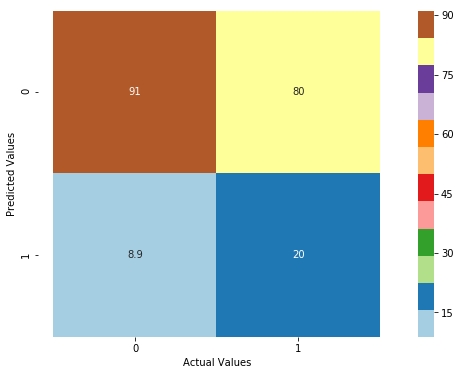

In [43]:
print("Plotting Confusion Matrix of Logistic Regression Classifer :")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

### ROC Curve of Logistic Regression Model on Balanced Dataset:

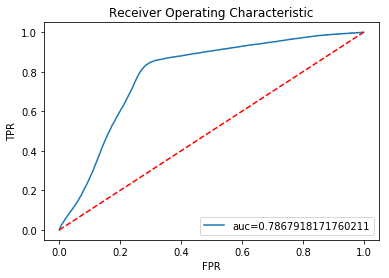

In [42]:
from sklearn import metrics
y_pred_prob = log_reg_model.predict_proba(X_test_std_bal)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test_bal,y_pred_prob)
auc = metrics.roc_auc_score(Y_test_bal,y_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### AUC of Logistic Regression Model is 78.68%

## 2) Decision Tree Model on Balanced Data

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')

model_DT.fit(X_train_std_bal,Y_train_bal)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

Predicting the output for X_test :

In [45]:
Y_pred = model_DT.predict(X_test_std)

### Evaluation of the DT model on Balanced Data:

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_mat = confusion_matrix(Y_test_bal, Y_pred)
print(confusion_mat)
print("Classification report: ")
print(classification_report(Y_test_bal, Y_pred))
acc= accuracy_score(Y_test_bal, Y_pred)
print("Accuracy of the DT model: ",acc *100, "%")
print("Precision of the DT model: ",metrics.precision_score(Y_test_bal, Y_pred))
print("Recall of the DT model:: ",metrics.recall_score(Y_test_bal, Y_pred))

[[226668   5781]
 [ 20479   4063]]
Classification report: 
             precision    recall  f1-score   support

          0       0.92      0.98      0.95    232449
          1       0.41      0.17      0.24     24542

avg / total       0.87      0.90      0.88    256991

Accuracy of the DT model:  89.78174332953294 %
Precision of the DT model:  0.41273872409589596
Recall of the DT model::  0.16555292967158342


Plotting Confusion Matrix of Decision Tree:


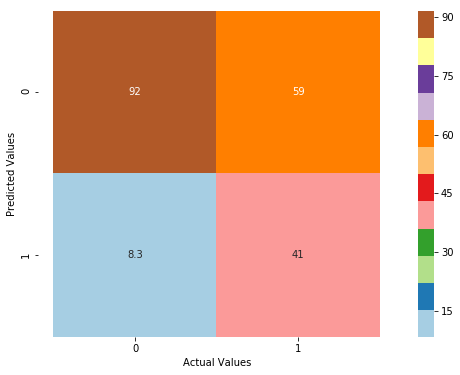

In [47]:
print("Plotting Confusion Matrix of Decision Tree:")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')
plt.show()

### ROC curve of DT Model on Balanced Data

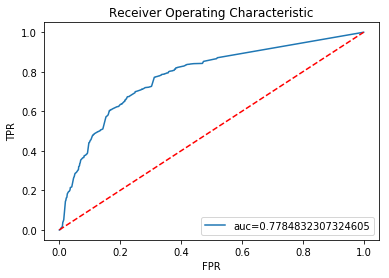

In [48]:
y_dt_pred_prob = model_DT.predict_proba(X_test_std_bal)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test_bal,y_dt_pred_prob)
auc = metrics.roc_auc_score(Y_test_bal,y_dt_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### AUC of DT model on Balanced Data is 77.848%

## 3) Random Forest Model on Balanced data

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50)
rf_model = forest.fit(X_train_std_bal,Y_train_bal)

In [50]:
forest.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [51]:
y_rf_pred = rf_model.predict(X_test_std_bal) #predicted values of y

### Evaluation of RF Model on Balanced Data

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_mat = confusion_matrix(Y_test_bal, y_rf_pred)
print(confusion_mat)
print("Classification report: ")
print(classification_report(Y_test_bal, y_rf_pred))
acc= accuracy_score(Y_test_bal, y_rf_pred)
print("Accuracy of the RF model: ",acc*100, "%")
print("Precision of the RF model: ",metrics.precision_score(Y_test_bal, y_rf_pred))
print("Recall of the RF model:: ",metrics.recall_score(Y_test_bal, y_rf_pred))
print("F1 Score of the RF model:: ",metrics.f1_score(Y_test_bal, y_rf_pred))

[[231955    494]
 [ 24158    384]]
Classification report: 
             precision    recall  f1-score   support

          0       0.91      1.00      0.95    232449
          1       0.44      0.02      0.03     24542

avg / total       0.86      0.90      0.86    256991

Accuracy of the RF model:  90.40744617515787 %
Precision of the RF model:  0.43735763097949887
Recall of the RF model::  0.01564664656507212
F1 Score of the RF model::  0.030212431156569627


Plotting Confusion Matrix of Random Forest :


(0.0, 2.0, 2.0, 0.0)

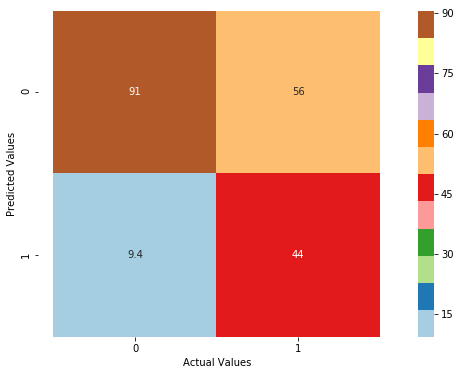

In [53]:
print("Plotting Confusion Matrix of Random Forest :")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

### ROC Curve of RF Model on Balanced Data:

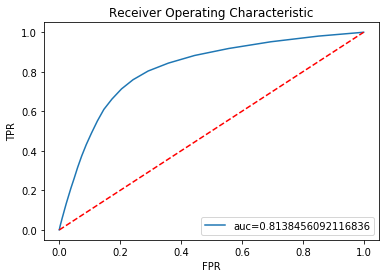

In [54]:
y_rf_pred_prob = rf_model.predict_proba(X_test_std_bal)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test_bal,y_rf_pred_prob)
auc = metrics.roc_auc_score(Y_test_bal,y_rf_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### AUC of the RF Model on Balanced Data is 81.38%

## 4) AdaBoost Classifier on Balanced Data

In [57]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost_model = adaboost.fit(X_train_std_bal,Y_train_bal)

In [58]:
adaboost_model 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [59]:
y_adaboost_pred = adaboost_model.predict(X_test_std_bal) #predicted values of y

### Evaluation of the AdaBoost Model on Balanced Data:

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_mat = confusion_matrix(Y_test_bal, y_adaboost_pred)
print(confusion_mat)

print("Classification report: ")
print(classification_report(Y_test_bal, y_adaboost_pred))

acc= accuracy_score(Y_test_bal, y_adaboost_pred)
print("Accuracy of the AdaBoost Classifier model: ",acc *100, "%")
print("precision of the AdaBoost Classifier model: ",metrics.precision_score(Y_test_bal, y_adaboost_pred))
print("recall of the AdaBoost Classifier model:: ",metrics.recall_score(Y_test_bal, y_adaboost_pred))

[[230225   2224]
 [ 23442   1100]]
Classification report: 
             precision    recall  f1-score   support

          0       0.91      0.99      0.95    232449
          1       0.33      0.04      0.08     24542

avg / total       0.85      0.90      0.86    256991

Accuracy of the AdaBoost Classifier model:  90.01287982847649 %
precision of the AdaBoost Classifier model:  0.3309265944645006
recall of the AdaBoost Classifier model::  0.04482112297286285


Plotting Confusion Matrix of AdaBoost Classifer :


(0.0, 2.0, 2.0, 0.0)

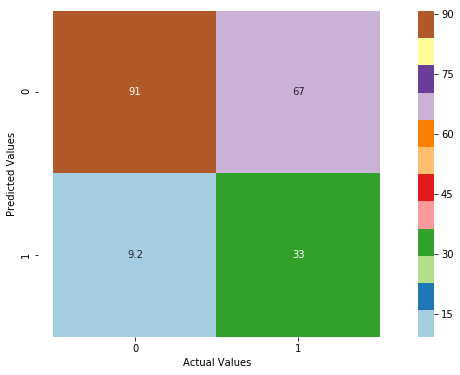

In [61]:
print("Plotting Confusion Matrix of AdaBoost Classifer :")

fig, axes = plt.subplots(figsize=(8,6))
confusion_mat = (confusion_mat.astype('float')/confusion_mat.sum(axis=0))*100
ax=sns.heatmap(confusion_mat,annot=True,cmap='Paired')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.axis('equal')

### ROC Curve of the AdaBoost Model on Balanced Data:

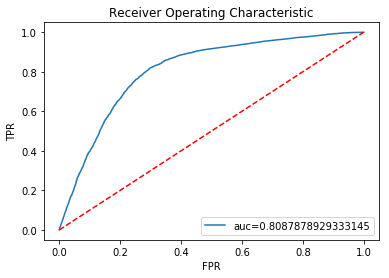

In [62]:
#ROC curve
y_ad_pred_prob = adaboost_model.predict_proba(X_test_std_bal)[:,1]
fpr,tpr,thr = metrics.roc_curve(Y_test_bal,y_ad_pred_prob)
auc = metrics.roc_auc_score(Y_test_bal,y_ad_pred_prob)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Model Comparisons :

### UnBalanced Data Models: 

    Model Name       | AUC    | Precision | Recall | Accuracy
=============================================================

    1) Logistic Reg  | 78.02% | 0.3658    | 0.0006 | 90.45%

    2) Decision Tree | 79.52% | 0.2727    | 0.0001 | 90.46%

    3) Random Forest | 80.20% | 0.3770    | 0.0048 | 90.42%

    4) Ada Boost Cla | 81.86% | 0.25      | 0.0002 | 90.44%


### Balanced Data Models: 

    Model Name       | AUC    | Precision | Recall | Accuracy
===============================================================

    1) Logistic Reg  | 78.68% | 0.2024    | 0.1294 | 86.82%

    2) Decision Tree | 77.85% | 0.4127    | 0.1656 | 89.78%

    3) Random Forest | 81.38% | 0.4373    | 0.0156 | 90.47%

    4) Ada Boost Cla | 80.88% | 0.3309    | 0.0448 | 90.01%

## Conclusion:

This project focused on building different machine learning models and evaluating the performance of logistic regression, random forest, decision tree and  AdaBoost Classifier with unbalanced train data and balanced train data.

We found that after oversampling the minority class by Synthetic Minority Over-Sampling Technique (SMOTE) in the training set, the precision and recall score improves for every model. Considering all the cases,random forest model that works better than logistic regression.The best model selected out of all models that have been tested is Random Forest model with an accuracy of 90.47% with unbalanced data and 90.42% with balanced data.

Loan Default Analysis is a very crucial part of the banking sector and it plays an important role in the growth of the bank’s profit. Using analyzing techniques one can predict or analyze that a person applying for loan will repay the loan or not. So, multiples algorithms have been implemented to analyze a defaulter. To overcome the crisis of loss of revenue, Loan Default analysis will help banks to grow and earn profit.
